# A1: Predicting Car Price 

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
# import warnings
import matplotlib

In [28]:
df = pd.read_csv('./Cars.csv')

In [29]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

* For the feature owner, map First owner to 1, ..., Test Drive Car to 5

In [31]:
set(df["owner"])

{'First Owner',
 'Fourth & Above Owner',
 'Second Owner',
 'Test Drive Car',
 'Third Owner'}

In [32]:
df["owner"] = le.fit_transform(df["owner"])+1

In [33]:
set(df["owner"])

{1, 2, 3, 4, 5}

In [34]:
le.classes_

array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Test Drive Car', 'Third Owner'], dtype=object)

In [35]:
le.transform(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Test Drive Car', 'Third Owner'])+1

array([1, 2, 3, 4, 5])

In [36]:
corelation = df.corr()

<AxesSubplot:>

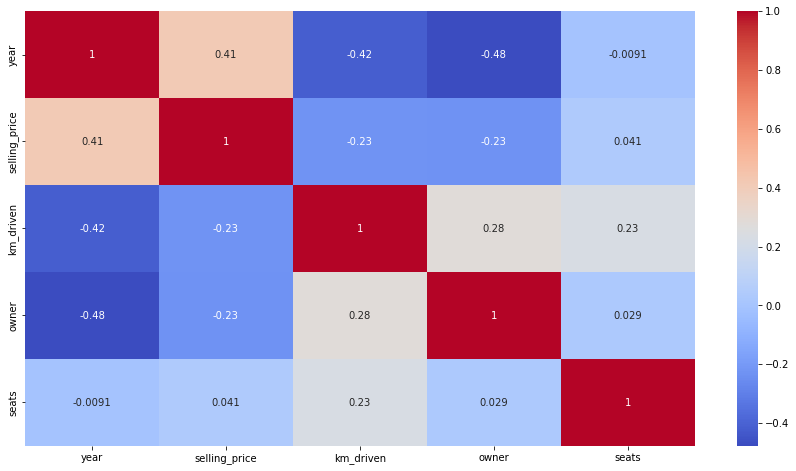

In [37]:
plt.figure(figsize = (15,8))
sns.heatmap(corelation,  annot=True, cmap="coolwarm")

• For the feature fuel, remove all rows with CNG and LPG because CNG and LPG use a different
mileage system i.e., km/kg which is different from kmfeaturepl for Diesel and Petrol

In [38]:
df['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

drop

In [39]:
df_filtered = df.loc[~df['fuel'].isin(['CNG', 'LPG'])]

In [40]:
df_filtered['fuel'].value_counts()

Diesel    4402
Petrol    3631
Name: fuel, dtype: int64

 For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float).
Hint: use df.mileage.str.split

In [41]:
df_filtered['mileage'] = df_filtered['mileage'].str.split(' ').str[0].astype(float)

C:\Users\earth\AppData\Local\Temp/ipykernel_20592/2623974101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['mileage'] = df_filtered['mileage'].str.split(' ').str[0].astype(float)


In [42]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   int32  
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   object 
 10  max_power      7825 non-null   object 
 11  torque         7819 non-null   object 
 12  seats          7819 non-null   float64
dtypes: float64(2), int32(1), int64(3), object(7)
memory usage: 847.2+ KB


<AxesSubplot:>

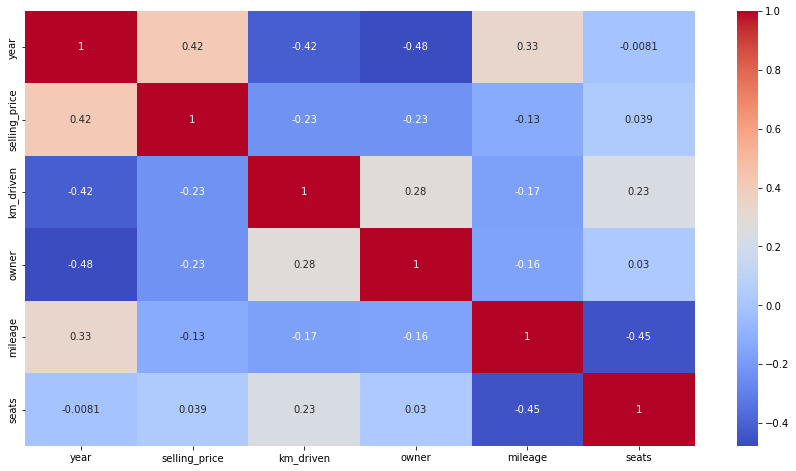

In [43]:
filtered_corr = df_filtered.corr()
plt.figure(figsize = (15,8))
sns.heatmap(filtered_corr,  annot=True, cmap="coolwarm")

• For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)

In [44]:
df_filtered['engine'] = df_filtered['engine'].str.split(' ').str[0].astype(float)

C:\Users\earth\AppData\Local\Temp/ipykernel_20592/3239265068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['engine'] = df_filtered['engine'].str.split(' ').str[0].astype(float)


In [45]:
df_filtered

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,3,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,5,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,2,16.80,1493.0,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70 bhp,140Nm@ 1800-3000rpm,5.0


 Do the same for max power

In [46]:
df_filtered['max_power'] = df_filtered['max_power'].str.split(' ').str[0].astype(float)

C:\Users\earth\AppData\Local\Temp/ipykernel_20592/1974573241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['max_power'] = df_filtered['max_power'].str.split(' ').str[0].astype(float)


In [47]:
df_filtered

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,3,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,5,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,2,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


 For the feature brand, take only the first word and remove the rest

In [23]:
df_filtered['name'] = df_filtered['name'].str.split(' ').str[0]

C:\Users\earth\AppData\Local\Temp/ipykernel_20592/81196181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['name'] = df_filtered['name'].str.split(' ').str[0]


Drop the feature torque, simply because Chaky’s company does not understand well about it

In [48]:
df_filtered = df_filtered.drop('torque', axis=1)

In [49]:
df_filtered

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,3,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,5,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,2,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


You will found out that Test Drive Cars are ridiculously expensive. Since we do not want to
involve this, we will simply delete all samples related to it

In [50]:
df_filtered['owner'].unique()

array([1, 3, 5, 2, 4])

In [51]:
df_filtered['owner'].count()

8033

In [52]:
df_filteredd = df_filtered[df_filtered['owner'] != 5]

In [53]:
df_filteredd['seller_type'].count()

7486

In [54]:
df_filteredd['owner'].unique()

array([1, 3, 2, 4])

In [55]:
df_filteredd

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,3,21.14,1498.0,103.52,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,1,20.14,1197.0,81.86,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,2,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


 Since selling price is a big number, it can cause your prediction to be very unstable. One trick
is to first transform the label using log transform, i.e.,

In [49]:
df_filteredd['selling_price'] = np.log(df_filteredd['selling_price'])

C:\Users\earth\AppData\Local\Temp/ipykernel_18580/2761593400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filteredd['selling_price'] = np.log(df_filteredd['selling_price'])


In [57]:
df_filteredd.to_csv('database.csv')


In [56]:
df_filteredd

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,3,21.14,1498.0,103.52,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,1,20.14,1197.0,81.86,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,2,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


<AxesSubplot:>

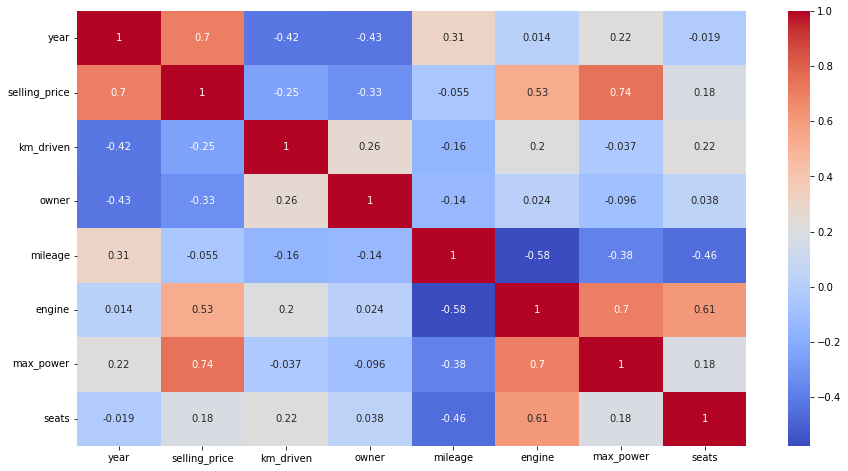

In [51]:
filtered_corr = df_filteredd.corr()
plt.figure(figsize = (15,8))
sns.heatmap(filtered_corr,  annot=True, cmap="coolwarm")

In [52]:
df_filteredd

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,120000,Diesel,Individual,Manual,3,21.14,1498.0,103.52,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
5,Hyundai,2017,12.994530,45000,Petrol,Individual,Manual,1,20.14,1197.0,81.86,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,12.676076,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,11.813030,119000,Diesel,Individual,Manual,2,16.80,1493.0,110.00,5.0
8125,Maruti,2009,12.853176,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,12.577636,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


In [35]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress the specific warning and display it once
warnings.filterwarnings("once", category=UserWarning, message="The least populated class in y has only 1 members")

# Your code that triggers the warning
# ...

# Reset warnings configuration
warnings.resetwarnings()

<AxesSubplot:xlabel='x', ylabel='y'>

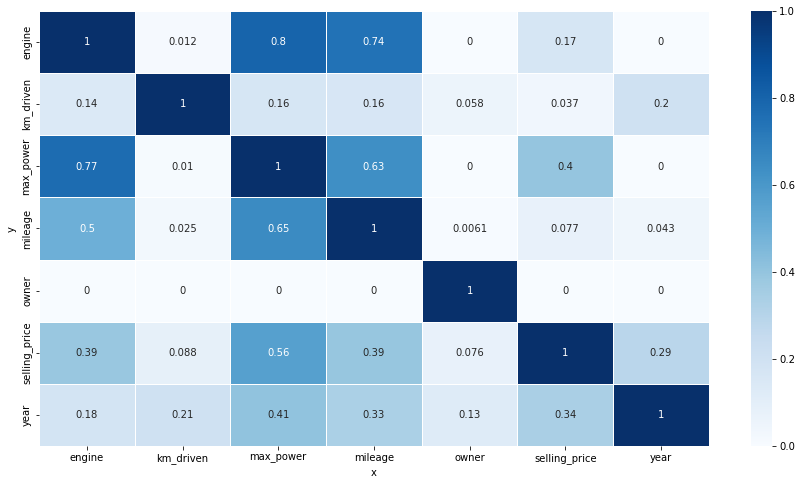

In [53]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df_filteredd.copy()
dfcopy.drop(['seats', 'transmission', 'name', 'seller_type', 'fuel'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

We should use engine max_power and years

In [54]:
X = dfcopy[['engine', 'max_power', 'year']]
y = dfcopy["selling_price"]

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)

In [56]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)

In [40]:
# scaler.fit_transform([[1294, 74, 2014]])

In [57]:
X_train

,engine,max_power,year
1073,2755.0,174.50,2018
7299,1248.0,74.00,2018
1864,1248.0,88.50,2018
2608,1582.0,126.30,2013
7359,1199.0,88.70,2015
...,...,...,...
1881,1248.0,88.50,2018
3528,1197.0,81.80,2018
5765,1461.0,65.00,2012
7826,1498.0,98.60,2017


In [58]:
X_train[['engine', 'max_power', 'year']].isna().sum()

engine       119
max_power    114
year           0
dtype: int64

In [59]:
X_train

,engine,max_power,year
1073,2755.0,174.50,2018
7299,1248.0,74.00,2018
1864,1248.0,88.50,2018
2608,1582.0,126.30,2013
7359,1199.0,88.70,2015
...,...,...,...
1881,1248.0,88.50,2018
3528,1197.0,81.80,2018
5765,1461.0,65.00,2012
7826,1498.0,98.60,2017


In [60]:
X_test[['engine', 'max_power', 'year']].isna().sum()

engine       51
max_power    50
year          0
dtype: int64

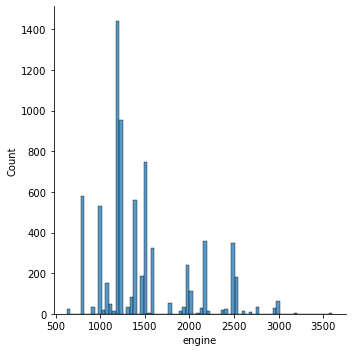

In [61]:
sns.displot(data=dfcopy, x='engine')

In [62]:
mode_value = dfcopy['engine'].mode()[0]
print("Mode (value with highest count):", mode_value)

Mode (value with highest count): 1248.0


In [63]:
dfcopy['engine'].median()

1248.0

In [64]:
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['year'].fillna(X_train['year'].median(), inplace=True)

c:\Users\earth\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [65]:
X_test['engine'].fillna(X_test['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_test['max_power'].median(), inplace=True)
X_test['year'].fillna(X_test['year'].median(), inplace=True)

In [66]:
X_train[['engine', 'max_power', 'year']].isna().sum()

engine       0
max_power    0
year         0
dtype: int64

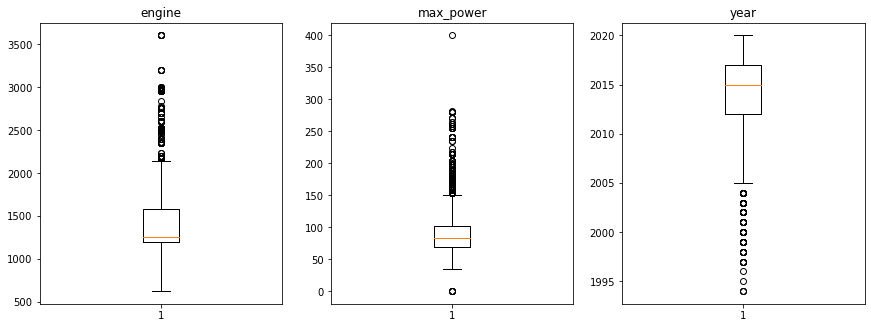

In [67]:
# Create a dictionary of columns.
col_dict = {'engine':1,'max_power':2,'year':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [68]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [69]:
for col in X_train.columns:
    outlier_count(col)


---------------engine---------------

Number of outliers: 782
Percent of data that is outlier: 14.92%

---------------max_power---------------

Number of outliers: 384
Percent of data that is outlier: 7.33%

---------------year---------------

Number of outliers: 120
Percent of data that is outlier: 2.29%


In [70]:
X_train

,engine,max_power,year
1073,2755.0,174.50,2018
7299,1248.0,74.00,2018
1864,1248.0,88.50,2018
2608,1582.0,126.30,2013
7359,1199.0,88.70,2015
...,...,...,...
1881,1248.0,88.50,2018
3528,1197.0,81.80,2018
5765,1461.0,65.00,2012
7826,1498.0,98.60,2017


In [71]:
X_test

,engine,max_power,year
7415,998.0,68.05,2018
2385,1248.0,74.00,2014
4177,2523.0,62.10,2013
2199,1248.0,75.00,2013
6254,799.0,53.30,2016
...,...,...,...
5471,998.0,66.10,2009
5463,1598.0,103.60,2014
4606,1598.0,103.60,2013
458,1461.0,83.80,2015


In [57]:
scaler.transform([[1197.0, 83.10, 2016]])

array([[-0.52473764, -0.24023891,  0.53708999]])

In [72]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [73]:
import pickle
with open('scaler2.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [74]:
X_train, X_test

(array([[ 2.59558821,  2.31907814,  1.00050406],
        [-0.42075201, -0.50297572,  1.00050406],
        [-0.42075201, -0.09581372,  1.00050406],
        ...,
        [ 0.00557876, -0.75569696, -0.5430382 ],
        [ 0.07963621,  0.18779568,  0.74324702],
        [ 0.07963621,  0.19790452,  0.48598998]]),
 array([[-0.92114024, -0.67005254,  1.00050406],
        [-0.42075201, -0.50297572, -0.02852411],
        [ 2.13122793, -0.83712936, -0.28578115],
        ...,
        [ 0.2797915 ,  0.32819636, -0.28578115],
        [ 0.00557876, -0.22779037,  0.22873293],
        [-0.42075201, -0.09581372,  0.74324702]]))

In [75]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5240, 3)
Shape of X_test:  (2246, 3)
Shape of y_train:  (5240,)
Shape of y_test:  (2246,)


In [76]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.09949959476804715
r2:  0.8593870662643776


In [77]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 2), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [78]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.10491013 -0.10395843 -0.09889786 -0.10191962 -0.10516895]; Mean: -0.10297100003954451
SVR - Score: [-0.084277   -0.08356583 -0.06633874 -0.07310285 -0.09426943]; Mean: -0.08031076749321413
KNeighbors Regressor - Score: [-0.06050218 -0.063182   -0.06080625 -0.06071889 -0.0622063 ]; Mean: -0.06148312489171415
Decision-Tree Regressor - Score: [-0.06486443 -0.07305353 -0.06691394 -0.06185328 -0.05560612]; Mean: -0.06445825873606989
Random-Forest Regressor - Score: [-0.05743066 -0.05437387 -0.05769083 -0.05350012 -0.05224108]; Mean: -0.05504731175033759


In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 2)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
# Split your data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

best_random_state = None
best_mse = float('inf')

for random_state in range(100):  # Try different random state values
    rf = RandomForestRegressor(random_state=random_state)
    
    grid = GridSearchCV(estimator=rf, 
                        param_grid=param_grid, 
                        cv=kfold, 
                        n_jobs=-1, 
                        return_train_score=True, 
                        refit=True,
                        scoring='neg_mean_squared_error')
    
    grid.fit(X_train, y_train)
    
    valid_mse = mean_squared_error(y_valid, grid.best_estimator_.predict(X_valid))
    
    if valid_mse < best_mse:
        best_mse = valid_mse
        best_random_state = random_state

print(f"Best Random State: {best_random_state}")
print(f"Best Validation MSE: {best_mse:.2f}")

Best Random State: 2
Best Validation MSE: 0.06


In [145]:
from sklearn.metrics import mean_squared_error

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return mse

# After your grid search is done and you have your best model
best_model = grid.best_estimator_

# Evaluate the best model on the training data
train_mse = evaluate_model(best_model, X_train, y_train)

# Evaluate the best model on the test data
test_mse = evaluate_model(best_model, X_test, y_test)

print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Train MSE: 0.04
Test MSE: 0.06


In [158]:
best_mse = grid.best_score_

In [159]:
best_mse

-0.06228717687302383

In [ ]:
# Find your grid_search's best score
best_mse = grid.best_score_

In [160]:
#stored in this variable
#note that grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

array([0.06444048, 0.44842345, 0.48713607])

<BarContainer object of 3 artists>

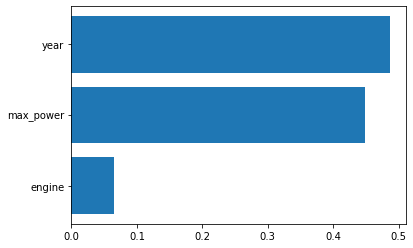

In [161]:
#let's plot
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

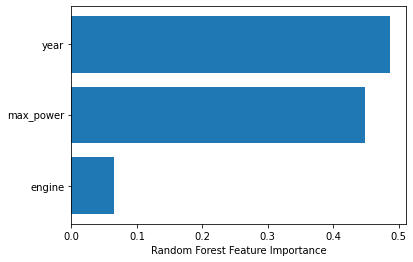

In [162]:
#hmm...let's sort first
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### Permutation way

This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

*Note*: The permutation based importance is computationally expensive. The permutation based method can have problem with highly-correlated features, it can report them as unimportant.

Text(0.5, 0, 'Random Forest Feature Importance')

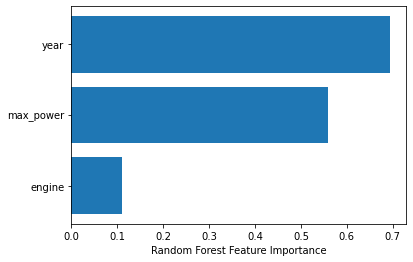

In [163]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### Shap way

The SHAP interpretation can be used (it is model-agnostic) to compute the feature importances. It is using the Shapley values from game theory to estimate the how does each feature contribute to the prediction. It can be easily installed (<code>pip install shap</code>) 

In [166]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

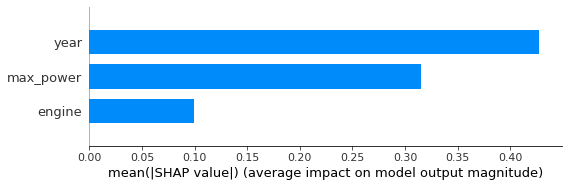

In [167]:
#shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

In [168]:
np.exp(grid.predict(X_test[2].reshape(1,-1)))

array([440490.7055295])

In [157]:
np.exp(y_test)

1588     720000.0
7974     625000.0
5339     500000.0
7511     245000.0
1990    2950000.0
          ...    
7818     500000.0
5282     350000.0
5299     350000.0
604      175000.0
4035     580000.0
Name: selling_price, Length: 2410, dtype: float64

In [82]:
import pickle

# save the model to disk
filename = 'model/price_predict2.model'
pickle.dump(grid, open(filename, 'wb'))
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [172]:
loaded_model = pickle.load(open(filename, 'rb'))

unclosed file <_io.BufferedReader name='model/price_predict.model'>


In [85]:
from sklearn.preprocessing import StandardScaler

# Assuming you have the pre-trained StandardScaler object called 'scaler'
scaler = StandardScaler()
scaler.fit(X_train)  # Fit the scaler on your training data

# Assuming you have the pre-trained RandomForestRegressor model called 'grid'
# You can use the best_estimator_ attribute to access the best trained model from GridSearchCV
best_model = grid.best_estimator_

# Input values for ('max_power', 'year', 'engine')
input_values = np.array([[1205, 78, 2014]])

# Transform the input values using the pre-trained scaler
scaled_input_values = scaler.transform(input_values)

# Predict using the trained model
predicted_price = best_model.predict(scaled_input_values)

print("Predicted Price:", np.exp(predicted_price))

Predicted Price: [7624627.54566107]


In [189]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_test) 

StandardScaler()

In [190]:
best_model = grid.best_estimator_

In [186]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,3,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,5,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,2,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [193]:
engine = input(f'type the engine in cc unit')
power = input(f'type the power in bhp unit')
year = input(f'type the year')

input_values = np.array([[engine, power, year]])

# Transform the input values using the pre-trained scaler
scaled_input_values = scaler.transform(input_values)

# Predict using the trained model
predicted_price = best_model.predict(scaled_input_values)

print("Predicted Price:", np.exp(predicted_price))

Predicted Price: [5380334.69304363]


In [194]:
X_train

array([[-0.92258874, -0.69316762,  0.53708999],
       [-0.4227758 , -0.49703961, -0.45504438],
       [-0.53273464, -0.08220771,  0.2890564 ],
       ...,
       [-1.3264376 , -1.25050981,  0.53708999],
       [-0.19086259, -0.69288542,  0.04102281],
       [-0.4227758 , -0.49647522,  0.78512358]])

In [197]:
standardized_values = [[-0.92258874, -0.69316762,  0.53708999],
                       [-0.4227758 , -0.49703961, -0.45504438],
                       [-0.53273464, -0.08220771,  0.2890564 ]]

In [198]:
original_values = scaler.inverse_transform(standardized_values)

print("Original Values:\n", original_values)

Original Values:
 [[-0.92961049 -0.69043247  0.52380877]
 [-0.43359788 -0.49481322 -0.46801361]
 [-0.54272064 -0.0810574   0.27585318]]


In [ ]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [72]:
scaler.fit_transform([[1248,74,2014]])

array([[0., 0., 0.]])

In [1]:
import pickle 

In [ ]:
new_data = [[1245, 78, 2014]]
scaled_new_data = scaler.transform(new_data)
print(scaled_new_data)

In [78]:
engine = input(f'type the engine in cc unit')
power = input(f'type the power in bhp unit')
year = input(f'type the year')

input_values = np.array([[engine, power, year]])
scaled_new_data = scaler.fit_transform(X_train)
X_te4  = scaler.transform(scaled_new_data)
predicted_price = grid.predict(X_te4)

print("Predicted Price:", np.exp(predicted_price))

Predicted Price: [ 482507.8842417   510104.61236744 2879508.50492814 ...  593662.5272939
  676322.82207196 1741187.55242239]


In [86]:
# save the model to disk
filename = 'model/price_predict2.model'
# pickle.dump(grid, open(filename, 'wb'))
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [88]:
with open('scaler2.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

In [92]:

power = input(f'type the power in bhp unit')
year = input(f'type the year')

input_values = np.array([[float(engine), float(power), int(year)]])

scaled = loaded_scaler.transform(input_values)

predicted_price = np.exp(loaded_model.predict(scaled))

print("Predicted Price:", predicted_price)

Predicted Price: [756895.92310552]


In [60]:
import numpy as np
import pandas as pd

# Given values
engine = 1205
power = 60
year = 2014
predicted_price = 450000

target_values = np.array([float(engine), float(power), int(year), predicted_price], dtype=np.float64)

# Calculate the Euclidean distances between target_values and each row in df
df_filteredd['distance'] = np.sqrt(np.sum((df_filteredd[['engine', 'max_power', 'year', 'selling_price']].values - target_values) ** 2, axis=1))

# # Find the row with the smallest distance
# most_similar_row = df_filteredd[df_filteredd['distance'] == df_filteredd['distance'].min()]

# print("Most similar row:")
# print(most_similar_row)

C:\Users\earth\AppData\Local\Temp/ipykernel_20592/1670400914.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filteredd['distance'] = np.sqrt(np.sum((df_filteredd[['engine', 'max_power', 'year', 'selling_price']].values - target_values) ** 2, axis=1))


In [61]:
most_similar_row = df_filteredd[df_filteredd['distance'] == df_filteredd['distance'].min()]

print("Most similar row:")
print(most_similar_row)

Most similar row:
                                    name  year  selling_price  km_driven  \
5129  Datsun GO Plus Anniversary Edition  2018         450000      80000   

        fuel seller_type transmission  owner  mileage  engine  max_power  \
5129  Petrol  Individual       Manual      1    20.62  1198.0       67.0   

      seats   distance  
5129    7.0  10.677078  
